# **Задание 2.**
Решите задачу распознавания лиц с помощью логистической регрессии (она также поддерживает опцию class_weight='balanced'):

Объявите модель, состоящую из pipeline(pca,logistic regression)

Подберите по сетке параметр C логистической регрессии (с помощью GridSearch)

Обучите модель на тренировочных данных и выведите наилучшие параметры модели

Какое качество показала эта модель?

# 1. Импортируем нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

import matplotlib.pyplot as plt

# 2. Загружаем наш датасет

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


# 3. Оценка данных

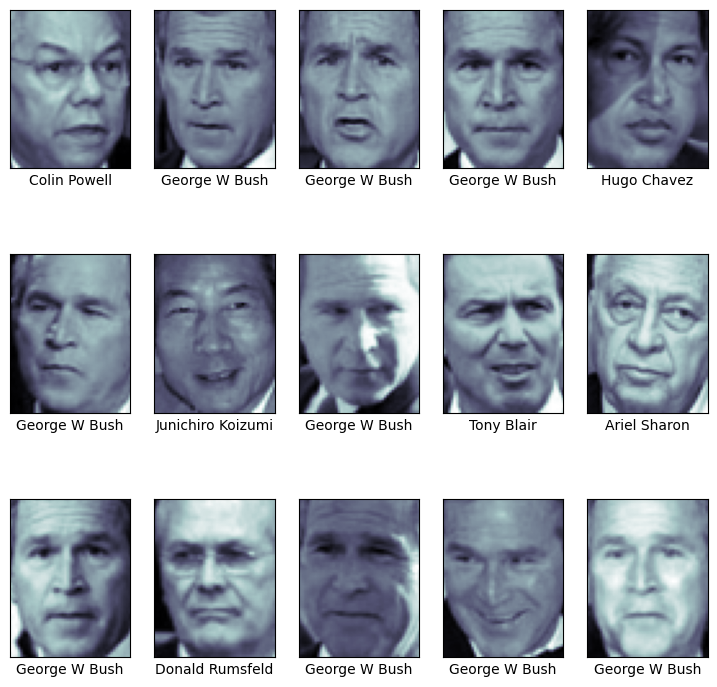

In [3]:
# Нарисуем несколько лиц из датасета
fig, ax = plt.subplots(3, 5, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

#4. Поработаем с признаками

In [5]:
# Каждое изображение имеет размер [62×47] - это примерно 3000 пикселей. Мы можем использовать пиксели как признаки, но давайте понизим размерность пространства признаков.
faces.images.shape

(1348, 62, 47)

In [7]:
# Извлечем 150 самых информативных признаков из данных фотографий методом RandomizedPCA (помним, что это метод уменьшения размерности).
from sklearn.svm import SVC
from sklearn.decomposition import PCA #Principal Components Analysis
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)

# 5. Построим модель методом Логистической Регрессии с разными гиперпараметрами

In [16]:
logistic_regression = LogisticRegression(solver='liblinear')
model = Pipeline([('scale', pca),
                  ('model', logistic_regression)])

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'model__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: user 10.8 s, sys: 6.99 s, total: 17.8 s
Wall time: 10.8 s
{'model__C': 1}


In [19]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

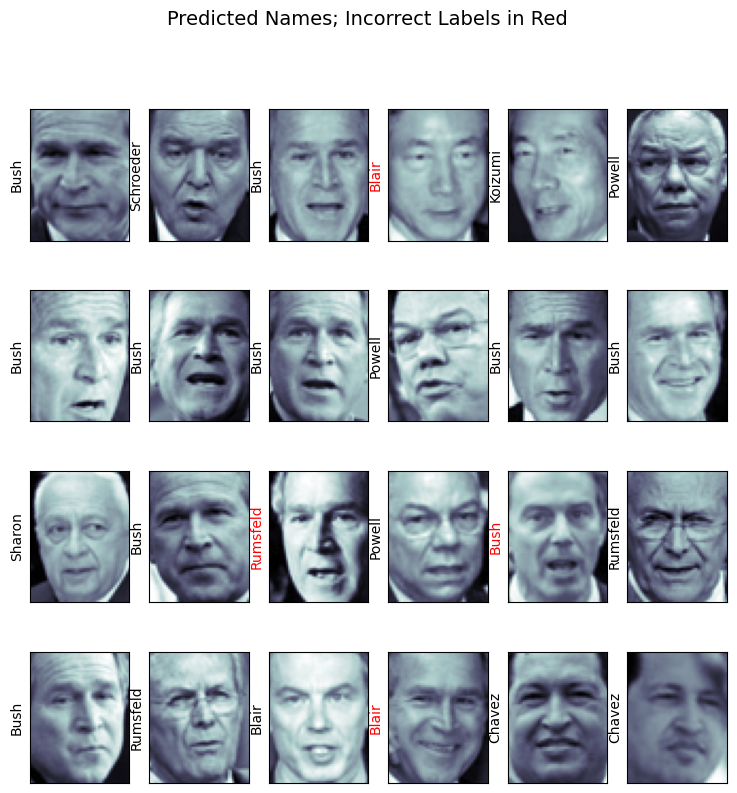

In [20]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);